<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0805_62%EC%9D%BC%EC%B0%A8_ML(house_3%EA%B3%BC%2C_iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!cp drive/MyDrive/house_price_train.csv .
house_df_org = pd.read_csv('house_price_train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [4]:
house_df.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1, inplace=True)

In [6]:
house_df.fillna(house_df.mean(), inplace=True)

두가지 종류의 Skewness 가 있다. Positive 와 Negative

Positive Skewness는 오른쪽 꼬리가 왼쪽보다 더 길때를 의미한다. 평균(Mean)과 중위수(Median) 가 Mode보다 크다.

Negative Skewness는 왼쪽 꼬리가 오른쪽보다 더 길때를 의미한다. 평균(Mean)과 중위수(Median) 가 Mode보다 작다.

skewness 가 -0.5 ~ 0.5 일경우 데이터는 상당히 대칭적이다.

skewness 가 -1 ~ 0.5이거나 0.5~1 일경우 데이터는 적당히 치우쳐 있다.

skewness 가 -1  ~ 1 보다 작거나

In [5]:
from scipy.stats import skew

In [16]:
house_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 75, dtype: object

In [19]:
#object값이 아닌것 index만 뽑아서 가져와라
features_index = house_df.dtypes[house_df.dtypes != 'object'].index

In [15]:
features_index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
skew_features = house_df[features_index].apply(lambda x : skew(x))

In [18]:
skew_features
#1보다 큰 값을 낮춰주는 과정 필요

MSSubClass        1.406210
LotFrontage       2.382499
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.673661
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.667488
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
SalePrice         0.121222
d

In [21]:
skew_features_top = skew_features[skew_features > 1]

In [24]:
skew_features_top.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64

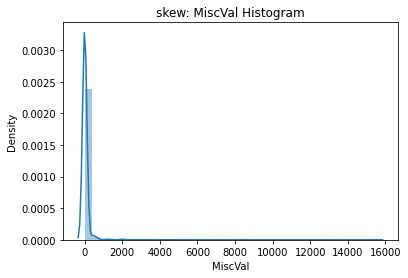

In [25]:
plt.title('skew: MiscVal Histogram')
sns.distplot(house_df['MiscVal'])

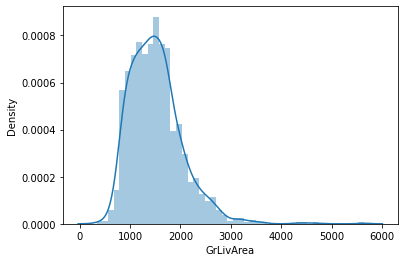

In [26]:
sns.distplot(house_df['GrLivArea'])

In [27]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [28]:
house_df.shape

(1460, 75)

In [29]:
house_df_ohe = pd.get_dummies(house_df)

In [30]:
house_df_ohe.shape

(1460, 271)

In [31]:
house_df_ohe['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [32]:
np.log1p(500000)

13.122365377402328

In [33]:
np.log1p(4000)

8.294299608857235

In [34]:
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

In [35]:
outlier_index

Int64Index([523, 1298], dtype='int64')

In [38]:
house_df_ohe.loc[[523, 1298], ['SalePrice', 'GrLivArea']]

,SalePrice,GrLivArea
523,12.126764,8.450412
1298,11.982935,8.638171


In [39]:
house_df_ohe.drop(outlier_index, axis = 0 , inplace=True)

In [40]:
house_df_ohe.shape

(1458, 271)

In [41]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1 , inplace=False)

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_features , y_target, test_size=0.2, random_state=156)

In [45]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [46]:
def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [48]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [50]:
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.112
Lasso 로그 변환된 RMSE: 0.228


[0.1286494160487029, 0.11173003303588626, 0.2280006118319563]

In [51]:
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

In [53]:
best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha:{'alpha': 0.001}


In [54]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 8)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha= 0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [55]:
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.103
Lasso 로그 변환된 RMSE: 0.1


[0.1286494160487029, 0.10345177546603244, 0.10024170460890035]

In [56]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])



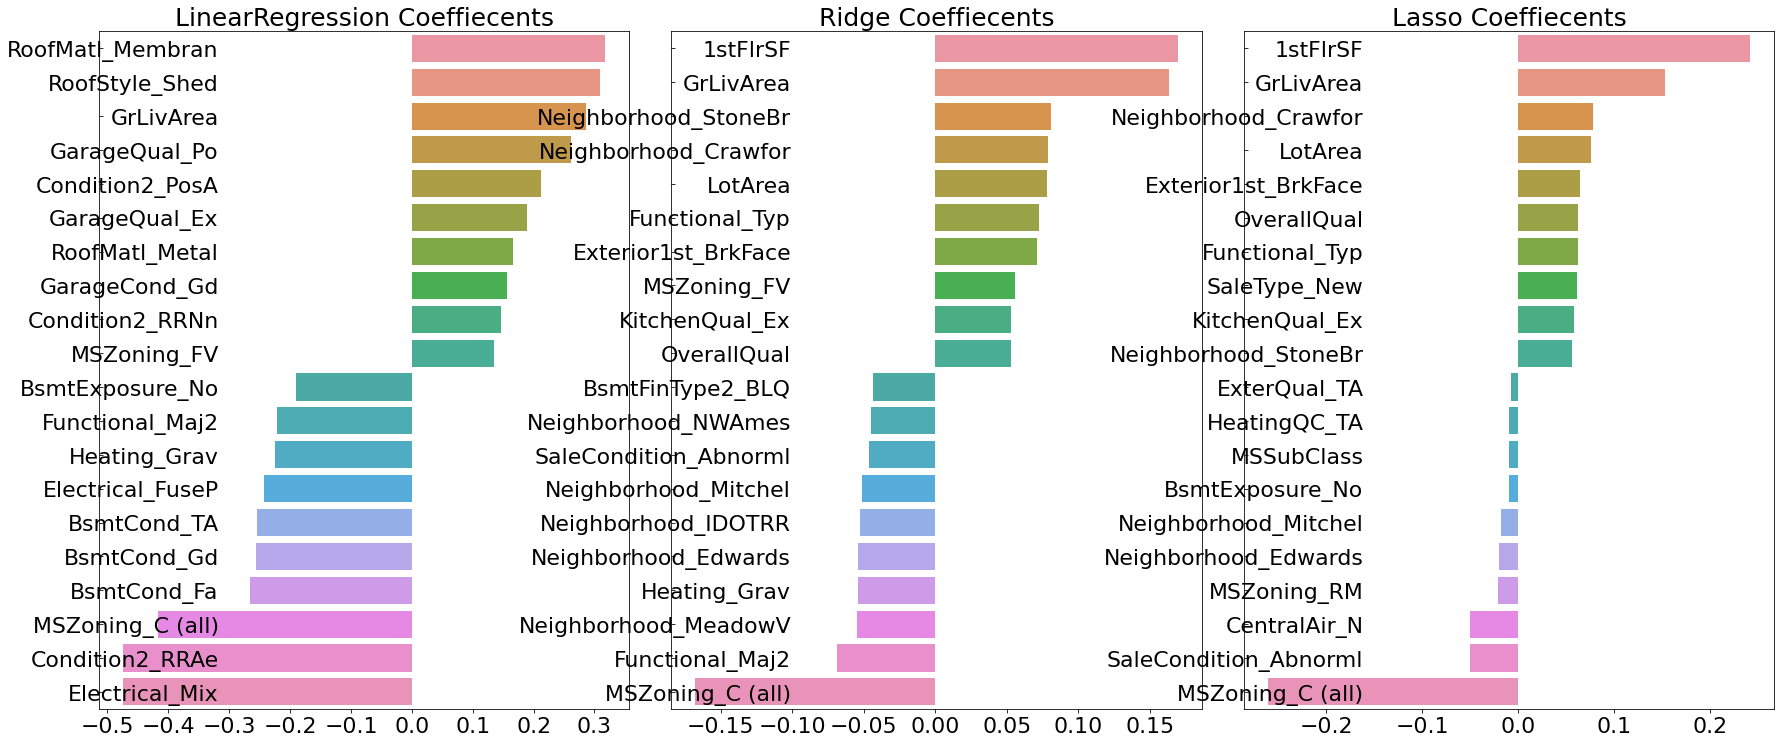

In [58]:
visualize_coefficient(models)

#PCA

(Principal Component Analysis)

차원 축소 : 데이터를 대표하는 주성분을 추출해 차원을 축소하는 기법

즉, feature의 개수를 줄여간다

변동성을 크게 해준다

In [59]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [61]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)

PCA(n_components=2)

In [63]:
iris_pca = pca.transform(iris_scaled)

In [ ]:
iris_pca

In [65]:
iris_pca.shape

(150, 2)

In [66]:
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca , columns= pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


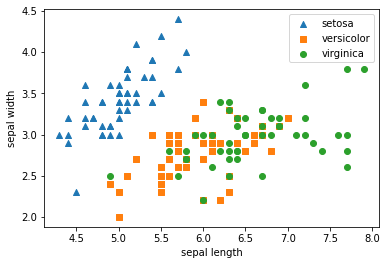

In [60]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

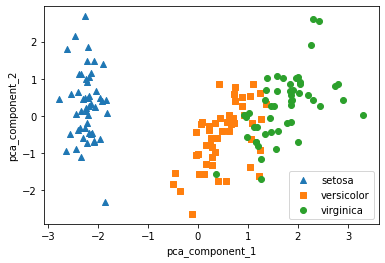

In [67]:
#pca_component_1 을 x축, pc_component_2 를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker= marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [68]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])